In [ ]:
# this file creates a csv of all lat long (to the 1000th place) points in manhattan.

In [4]:
# load necessary packages
import geopandas as gpd
from shapely.geometry import Point, Polygon
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from itertools import product
%matplotlib inline

In [170]:
# read in NYC boroughs shapes
boroughs = gpd.read_file('/Users/allisonhonold/ds0805/walk_proj/walk_risk_engine/data/shapes/boroughboundaries.shp')
print(boroughs.loc[4, 'geometry'])

MULTIPOLYGON (((-74.01092841268031 40.68449147254294, -74.01193259977079 40.6838877491549, -74.01217596614636 40.68409518562846, -74.0087859013092 40.68614660229886, -74.00869559823525 40.68619331801269, -74.00859803329713 40.68625256408497, -74.00835446532174 40.68640020025069, -74.00816414527888 40.68617471716152, -74.00842516085906 40.68601553244519, -74.00851294191318 40.68596254858371, -74.00860072436832 40.6859095646548, -74.01092841268031 40.68449147254294)), ((-74.00500373315074 40.68760598540084, -74.00562986330395 40.68678420554105, -74.00783293766683 40.68738505516271, -74.00742012154097 40.6882062904359, -74.00500373315074 40.68760598540084)), ((-74.00382038853709 40.68892964469931, -74.00459270521772 40.68821522298657, -74.00678438373785 40.68882687995831, -74.00636461225267 40.68966966863697, -74.00382038853709 40.68892964469931)), ((-74.00297565370539 40.6904265759207, -74.00340921558492 40.68961326065754, -74.00575900670344 40.69023640001618, -74.00534209624915 40.69109

In [6]:
# understand how bounds works, see borough bounds
# for index in boroughs.index:
#     polygons = boroughs.loc[index, 'geometry']
#     print(index, polygons.bounds)

In [7]:
# get manhattan geometry
man_poly = boroughs.loc[4, 'geometry']
man_poly.bounds

(-74.04772962763064, 40.68291694544512, -73.90665099473267, 40.87903804730722)

In [8]:
# set dimensions of grid to test for presence in manhattan
minx = round(man_poly.bounds[0], 3) - .001
miny = round(man_poly.bounds[1], 3) - .001
maxx = round(man_poly.bounds[2], 3) + .001
maxy = round(man_poly.bounds[3], 3) + .001

In [129]:
def create_pt_grid(minx, miny, maxx, maxy):
    """creates a grid of points (lat/longs) in the range specified. lat longs 
    are rounded to hundredth place

    Args:
        minx: minimum longitude
        miny: minimum latitude
        maxx: maximum longitude
        maxy: maximum latitude

    Returns: DataFrame of all lat/long combinations in region
    """
    lats = range(int(miny*1000), int(maxy*1000 +1))
    longs = range(int(minx*1000), int(maxx*1000 +1))
    ll_df = pd.DataFrame(product(lats, longs), 
                    columns=['lat1000', 'long1000'])
    ll_df['longitude'] = ll_df['long1000']/1000
    ll_df['latitude'] = ll_df['lat1000']/1000
#     ll_df['geometry'] = [Point(x, y) for x, y in zip(ll_df['longitude'], 
#                                                      ll_df['latitude'])]
    return ll_df

In [161]:
pts_df = create_pt_grid(minx, miny, maxx, maxy)
pts_gdf = gpd.GeoDataFrame(pts_df, geometry=gpd.points_from_xy(pts_df['longitude'], pts_df['latitude']))

In [162]:
pts_gdf.head()

,lat1000,long1000,longitude,latitude,geometry
0,40682,-74049,-74.049,40.682,POINT (-74.04900 40.68200)
1,40682,-74048,-74.048,40.682,POINT (-74.04800 40.68200)
2,40682,-74047,-74.047,40.682,POINT (-74.04700 40.68200)
3,40682,-74046,-74.046,40.682,POINT (-74.04600 40.68200)
4,40682,-74045,-74.045,40.682,POINT (-74.04500 40.68200)


In [165]:
pts_gdf['in_man'] = np.nan
man = boroughs.loc[4,'geometry']

In [168]:
for index in range(pts_gdf.shape[0]): 
    if index%5000==0:
        print(index)
#     if np.isnan(geo_df.loc[df_index, 'in_man']): # updated col from 'in_nyc'
#     geo_df.loc[df_index, 'in_man'] = False
    pt = pts_gdf.loc[index, 'geometry']
    if pt.intersects(man):
        pts_gdf.loc[index, 'in_man'] = True
    else:
        pts_gdf.loc[index, 'in_man'] = False

0
5000
10000
15000
20000
25000


In [173]:
man_gdf = pts_gdf.loc[pts_gdf['in_man']==True]


In [174]:
man_gdf.head()

,lat1000,long1000,longitude,latitude,geometry,in_man
171,40683,-74023,-74.023,40.683,POINT (-74.02300 40.68300),True
315,40684,-74024,-74.024,40.684,POINT (-74.02400 40.68400),True
327,40684,-74012,-74.012,40.684,POINT (-74.01200 40.68400),True
458,40685,-74026,-74.026,40.685,POINT (-74.02600 40.68500),True
459,40685,-74025,-74.025,40.685,POINT (-74.02500 40.68500),True


In [114]:
test_df = pd.read_csv('/Users/allisonhonold/ds0805/walk_proj/walk_risk_engine/data/csv/man_lat_longs.csv')

In [92]:
test_df['latitude'].nunique()

195

In [106]:
man_df.head()

,latitude,longitude,lat1000,long1000
0,40.683,-74.023,40683,-74023
1,40.684,-74.024,40684,-74024
2,40.684,-74.012,40684,-74012
3,40.685,-74.026,40685,-74026
4,40.685,-74.025,40685,-74025


In [107]:
man_df.loc[(man_df['lat1000'] == 40753) & (man_df['long1000'] == -73989)]

,latitude,longitude,lat1000,long1000
1991,40.753,-73.989,40753,-73989


In [65]:
man_gdf['longitude'].nunique()

129

In [66]:
test_df['longitude'].nunique()

129

In [67]:
man_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 6312 entries, 170 to 28506
Data columns (total 4 columns):
latitude     6312 non-null float64
longitude    6312 non-null float64
geometry     6312 non-null geometry
in_man       6312 non-null bool
dtypes: bool(1), float64(2), geometry(1)
memory usage: 203.4 KB


In [94]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6312 entries, 0 to 6311
Data columns (total 2 columns):
latitude     6312 non-null float64
longitude    6312 non-null float64
dtypes: float64(2)
memory usage: 98.8 KB


In [98]:
man_df.loc[((man_df['latitude'] == 40.753) & (man_df['longitude'] == -73.989)), :]

,latitude,longitude
1991,40.753,-73.989


In [116]:
test_df['latitude'] = test_df['latitude']*1000/1000
test_df['longitude'] = test_df['longitude'] *1000/1000

In [118]:
test_df['latitude'] = test_df['lat1000']/1000
test_df['longitude'] = test_df['long1000']/1000

In [119]:
test_df.loc[((test_df['latitude'] == 40.753) & (test_df['longitude'] == -73.989))]

,latitude,longitude,lat1000,long1000
1991,40.753,-73.989,40753,-73989


In [110]:
test_df.loc[((test_df['lat1000'] == 40753) & (test_df['long1000'] == -73989)), :]

,latitude,longitude,lat1000,long1000
1991,40.753,-73.989,40753,-73989


In [97]:
test_df.head()

,latitude,longitude
0,40.683,-74.023
1,40.684,-74.024
2,40.684,-74.012
3,40.685,-74.026
4,40.685,-74.025


In [96]:
test_df.loc[test_df['Unnamed: 0'] == 10284, :]

KeyError: 'Unnamed: 0'

In [62]:
test_df['latitude'] = test_df['latitude'].astype(float)

In [63]:
test_df.loc[test_df['Unnamed: 0'] == 10284, 'latitude']

1991    40.753
Name: latitude, dtype: float64

In [60]:
type(40.753)

float

In [22]:
# creating a polygon to reduce the load of checking points, esp if doing all of ny
# poly2 = 

"""p5 = Point(-74.053, 40.688) #40.688310, -74.053245\n",
"p6 = Point(-74.06, 40.688)\n",
"p7 = Point(-74.06, 40.919)\n",
"p8 = Point(-73.913, 40.919) #40.919607, -73.953894\n",
"pointlist2 = [p5, p6, p7, p8]\n",
"poly2 = gpd.GeoSeries(Polygon([[p.x, p.y] for p in pointlist2]))"


"p1 = Point(-74.06, 40.659)\n",
"p2 = Point(-74.270, 40.655)\n",
"p3 = Point(-74.27, 40.914)\n",
"p4 = Point(-74.831, 40.914)\n",
"pointlist = [p1, p2, p3, p4]\n",
"poly = gpd.GeoSeries(geometry.Polygon([[p.x, p.y] for p in pointList]))"""

'p5 = Point(-74.053, 40.688) #40.688310, -74.053245\n",\n"p6 = Point(-74.06, 40.688)\n",\n"p7 = Point(-74.06, 40.919)\n",\n"p8 = Point(-73.913, 40.919) #40.919607, -73.953894\n",\n"pointlist2 = [p5, p6, p7, p8]\n",\n"poly2 = gpd.GeoSeries(Polygon([[p.x, p.y] for p in pointlist2]))"\n\n\n"p1 = Point(-74.06, 40.659)\n",\n"p2 = Point(-74.270, 40.655)\n",\n"p3 = Point(-74.27, 40.914)\n",\n"p4 = Point(-74.831, 40.914)\n",\n"pointlist = [p1, p2, p3, p4]\n",\n"poly = gpd.GeoSeries(geometry.Polygon([[p.x, p.y] for p in pointList]))'

In [23]:
# reducing the load of checking points for areas north of staten island
# geo_df.loc[((geo_df['latitude'] > 40.659) & (geo_df['longitude'] < -74.06)), 'in_nyc'] = False

#code for all boroughs

for df_index in range(40000, 60000):
    if df_index%500==0:
        print(df_index)
        if np.isnan(geo_df.loc[df_index, 'in_nyc']):
            geo_df.loc[df_index, 'in_nyc'] = False
            pt = gpd.GeoSeries(geo_df.loc[df_index, 'geometry'])
        if not pt.intersects(poly2).any():
            for b_index in boroughs.index:
                polygons = boroughs.loc[b_index, 'geometry']
                if pt.intersects(polygons).any():
                    geo_df.loc[df_index, 'in_nyc'] = True
                    break
geo_df[40000:60000].to_csv('geo_df_60k.csv')

In [24]:
pt = Point(-73.941368, 40.815709)
pt.intersects(man)

True

In [25]:
geo_df.shape

(28656, 4)

0
5000
10000
15000
20000
25000


In [28]:
man_gdf = gpd.GeoDataFrame(geo_df.loc[geo_df['in_man']==True])
man_gdf.head()

,latitude,longitude,geometry,in_man
170,40.683,-74.023,POINT (-74.02300 40.68300),True
313,40.684,-74.024,POINT (-74.02400 40.68400),True
325,40.684,-74.012,POINT (-74.01200 40.68400),True
455,40.685,-74.026,POINT (-74.02600 40.68500),True
456,40.685,-74.025,POINT (-74.02500 40.68500),True


In [86]:
man_df = pd.DataFrame(man_gdf.loc[:, 'latitude':'longitude'].reset_index(drop=True))

In [87]:
type(man_df)

pandas.core.frame.DataFrame

In [89]:
man_df.loc[((man_df['latitude'] == 40.753) & (man_df['longitude'] == -73.989)), :]

,latitude,longitude
1991,40.753,-73.989


In [99]:
man_df['lat1000'] = [int(x*1000) for x in man_df['latitude']]

In [100]:
man_df['long1000'] = [int(x*1000) for x in man_df['longitude']]

In [121]:
man_df.head()

,latitude,longitude,lat1000,long1000
0,40.683,-74.023,40683,-74023
1,40.684,-74.024,40684,-74024
2,40.684,-74.012,40684,-74012
3,40.685,-74.026,40685,-74026
4,40.685,-74.025,40685,-74025


In [177]:
man_gdf.to_csv('/Users/allisonhonold/ds0805/walk_proj/walk_risk_engine/data/csv/man_lat_longs.csv',
             index=False)

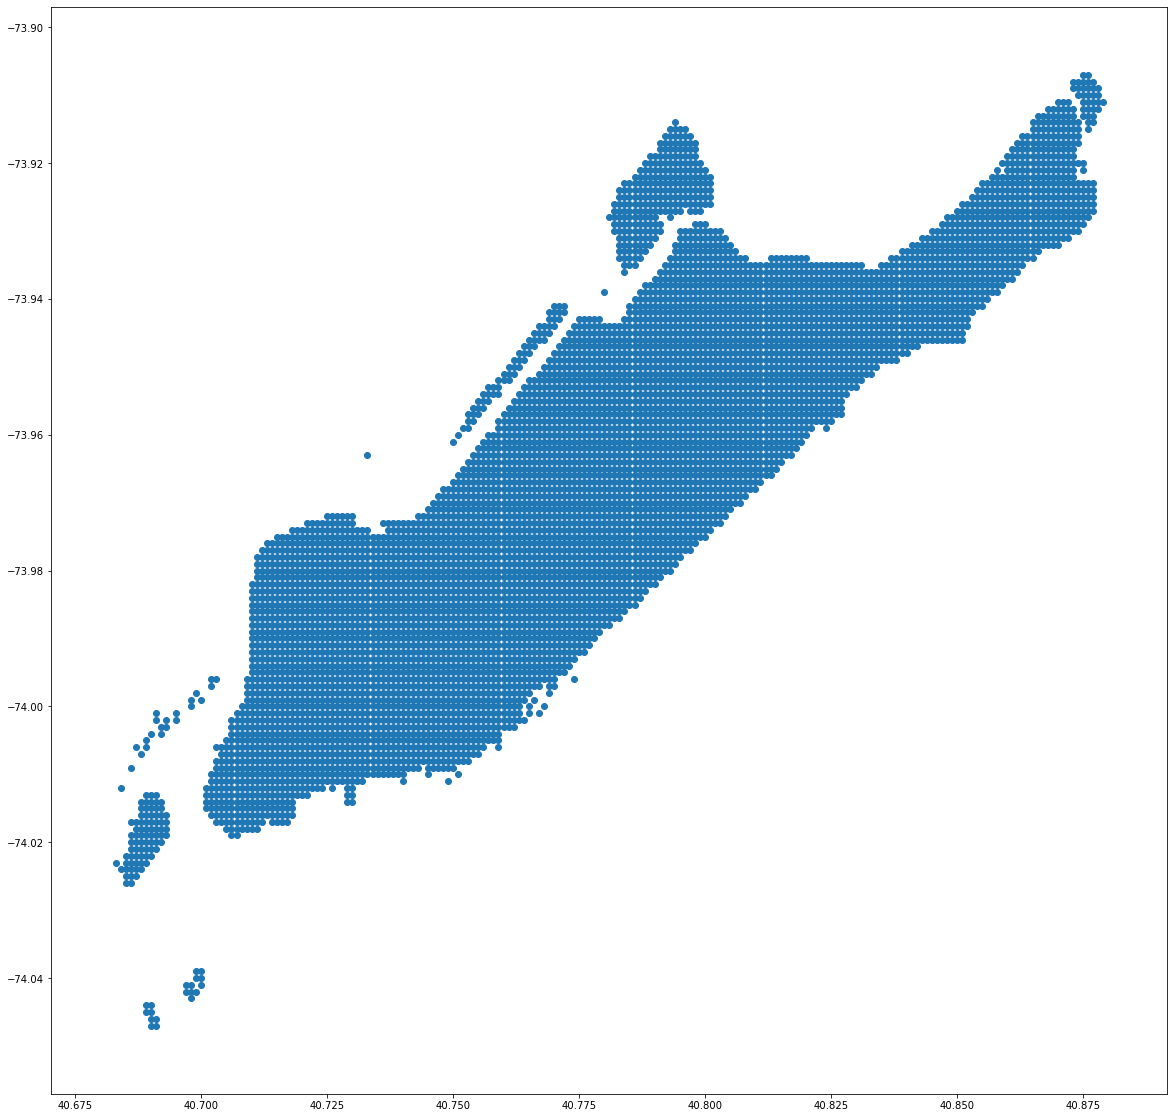

In [176]:
fig, ax = plt.subplots(figsize=(20,20))
# boroughs.plot(ax=ax, color='white', edgecolor='black')
ax.scatter(man_gdf['latitude'], man_gdf['longitude'], alpha=1)

In [26]:
man_gdf.shape

(6282, 4)

In [3]:
import pandas as pd

In [13]:
man_pts = pd.read_csv('man_lat_longs.csv')

In [14]:
all_pts = man_pts.head(10)

In [16]:
all_pts.loc[:, 'on_path'] = True

//anaconda3/envs/geo-env/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [19]:
all_pts = all_pts.drop(columns=['Unnamed: 0', 'in_man'])

In [20]:
all_pts

,latitude,longitude,geometry,on_path
0,40.683,-74.023,POINT (-74.02300000000001 40.683),True
1,40.684,-74.024,POINT (-74.024 40.684),True
2,40.684,-74.012,POINT (-74.012 40.684),True
3,40.685,-74.026,POINT (-74.02600000000001 40.685),True
4,40.685,-74.025,POINT (-74.02500000000001 40.685),True
5,40.685,-74.024,POINT (-74.024 40.685),True
6,40.685,-74.023,POINT (-74.02300000000001 40.685),True
7,40.685,-74.022,POINT (-74.02200000000001 40.685),True
8,40.686,-74.026,POINT (-74.02600000000001 40.686),True
9,40.686,-74.025,POINT (-74.02500000000001 40.686),True


In [21]:
manhattan_pts = man_pts.loc[:, ['latitude', 'longitude', 'in_man']]

In [22]:
    all_pts = pd.merge(all_pts, manhattan_pts, 
                        on=['latitude', 'longitude'],
                        how='left')

In [23]:
all_pts

,latitude,longitude,geometry,on_path,in_man
0,40.683,-74.023,POINT (-74.02300000000001 40.683),True,True
1,40.684,-74.024,POINT (-74.024 40.684),True,True
2,40.684,-74.012,POINT (-74.012 40.684),True,True
3,40.685,-74.026,POINT (-74.02600000000001 40.685),True,True
4,40.685,-74.025,POINT (-74.02500000000001 40.685),True,True
5,40.685,-74.024,POINT (-74.024 40.685),True,True
6,40.685,-74.023,POINT (-74.02300000000001 40.685),True,True
7,40.685,-74.022,POINT (-74.02200000000001 40.685),True,True
8,40.686,-74.026,POINT (-74.02600000000001 40.686),True,True
9,40.686,-74.025,POINT (-74.02500000000001 40.686),True,True


In [24]:
pd.DataFrame(all_pts.loc[(all_pts['on_path']==True) 
                        & (all_pts['in_man']==True)])

,latitude,longitude,geometry,on_path,in_man
0,40.683,-74.023,POINT (-74.02300000000001 40.683),True,True
1,40.684,-74.024,POINT (-74.024 40.684),True,True
2,40.684,-74.012,POINT (-74.012 40.684),True,True
3,40.685,-74.026,POINT (-74.02600000000001 40.685),True,True
4,40.685,-74.025,POINT (-74.02500000000001 40.685),True,True
5,40.685,-74.024,POINT (-74.024 40.685),True,True
6,40.685,-74.023,POINT (-74.02300000000001 40.685),True,True
7,40.685,-74.022,POINT (-74.02200000000001 40.685),True,True
8,40.686,-74.026,POINT (-74.02600000000001 40.686),True,True
9,40.686,-74.025,POINT (-74.02500000000001 40.686),True,True


In [2]:
nyc_pts = pd.read_csv('ny_pts.csv')

In [3]:
nyc_pts.shape

(83429, 5)